In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_dir = '/home/kost/python_data/trustpilot/topic/candidates'

## Similarity matrix (3 mln sentences x 8900 labels)

In [126]:
sims = []
for i in range(160):
    print('Reading batch %d'%i)
    s = pd.read_parquet('%s/topic_sims_int16.parquet.%d'%(data_dir,i))
    if s.shape[0]>0:
        sims.append(s)

Reading batch 0
Reading batch 1
Reading batch 2
Reading batch 3
Reading batch 4
Reading batch 5
Reading batch 6
Reading batch 7
Reading batch 8
Reading batch 9
Reading batch 10
Reading batch 11
Reading batch 12
Reading batch 13
Reading batch 14
Reading batch 15
Reading batch 16
Reading batch 17
Reading batch 18
Reading batch 19
Reading batch 20
Reading batch 21
Reading batch 22
Reading batch 23
Reading batch 24
Reading batch 25
Reading batch 26
Reading batch 27
Reading batch 28
Reading batch 29
Reading batch 30
Reading batch 31
Reading batch 32
Reading batch 33
Reading batch 34
Reading batch 35
Reading batch 36
Reading batch 37
Reading batch 38
Reading batch 39
Reading batch 40
Reading batch 41
Reading batch 42
Reading batch 43
Reading batch 44
Reading batch 45
Reading batch 46
Reading batch 47
Reading batch 48
Reading batch 49
Reading batch 50
Reading batch 51
Reading batch 52
Reading batch 53
Reading batch 54
Reading batch 55
Reading batch 56
Reading batch 57
Reading batch 58
Reading

In [127]:
sims = pd.concat(sims, axis=0)
sims = sims.set_index('_text_')

In [128]:
sims.shape

(3048056, 8867)

In [129]:
sims.sample(n=100).iloc[:20,:10].head(30)

treatment  representative  \
_text_                                                                          
informed goods to the value of 144, and informe...        157             102   
logiciel facile d'utilisation et une multitude ...        141             120   
the dolls should be 22 inches long and they sen...        -89            -169   
varen kom efter dag 2 sådan                               348             311   
where the lady could not even really advise me ...         65             107   
since then the product has been fantastic and t...         46             199   
es herrscht keinerlei entgegenkommen, man wird ...         77              56   
habe für 8 tage einen mietwagen 9sitzer gebucht...       -110            -198   
ekstremt ustabilt produkt, kan på ingen måde an...         71              93   
i skrev pakken ikke blev afleveret på adressen ...       -129            -130   
omg worst company everorder broadband with talk...         -6            -146   
i report this problem many times and im tired t...        -16             -82   
another real side i use                                   292             285   
har lige som mange sendt en læderjakke retur me...         99              93   
vielleicht gelinkt esja so, das solchen firmen ...        275             263   
det er bestemt ikke sidste gang, at jeg bruger ...         60              50   
ordered the 3d amplifier never received it                 47             -22   
i hoped my prior knowledge was incorrect but i ...         90              53   
they refuse to let one speak to a manager                 -71              -9   
to my surprise l was sent an email that l need ...        195             -12   

                                                    salary finance  webinar  \
_text_                                                                        
informed goods to the value of 144, and informe...             -69      129   
logiciel facile d'utilisation et une multitude ...              79      240   
the dolls should be 22 inches long and they sen...             -84      -90   
varen kom efter dag 2 sådan                                    170      253   
where the lady could not even really advise me ...             -65       66   
since then the product has been fantastic and t...              75      259   
es herrscht keinerlei entgegenkommen, man wird ...              17       68   
habe für 8 tage einen mietwagen 9sitzer gebucht...              69       46   
ekstremt ustabilt produkt, kan på ingen måde an...             -48      -24   
i skrev pakken ikke blev afleveret på adressen ...              32      -97   
omg worst company everorder broadband with talk...             -15      146   
i report this problem many times and im tired t...             -12       12   
another real side i use                                         25      227   
har lige som mange sendt en læderjakke retur me...              21       10   
vielleicht gelinkt esja so, das solchen firmen ...             286      191   
det er bestemt ikke sidste gang, at jeg bruger ...            -123      -30   
ordered the 3d amplifier never received it                    -108      140   
i hoped my prior knowledge was incorrect but i ...             -92      -79   
they refuse to let one speak to a manager                      107       24   
to my surprise l was sent an email that l need ...              15      192   

                                                    upwork  cheat  gold chain  \
_text_                                                                          
informed goods to the value of 144, and informe...     162     82          52   
logiciel facile d'utilisation et une multitude ...     234      2          76   
the dolls should be 22 inches long and they sen...    -133      9        -127   
varen kom efter dag 2 sådan                            303     85         165   
where the lady could not even really advise 

In [134]:
# topics describing given sentence
z = list(np.argsort(sims[sims.index=='ordered the 3d amplifier never received it'].values.flatten()))[::-1]
', '.join([list(sims.columns)[x] for x in z[:20]])

'zero client computers, blank media, blind, orchestral string instrument mutes, brass instrument mutes, dumbbell, cordless, hej.jeg vil ikke anbefale denne side., sound synthesizers, cymbal & drum mutes, blank id cards, cancellation, passive circuit components, thin & zero clients, pretend electronics, sunniside inte, pole vault pits, barebone computers, cordless phones, drywall'

In [135]:
# sentences related to given topic
z = list(np.argsort(sims.loc[:,'video game hardware'].values.flatten()))[::-1]
', '.join([list(sims.index)[x] for x in z[:10]])

'espectacular tienda de videojuegos, es la tienda online de videojuegos, los videojuegos han llegado rapidisimo, de los mejores sitios para comprar videojuegos, excelente tienda de videojuegos, ottimo sito per acquistare videogame, i bought a video game, pensate sia un videogioco, ottimo sito di videogames, il miglior sito dove acquistare console e videogiochi'

In [136]:
# globally most "near" topics
sims.mean().sort_values(ascending=False).head(20)

smart it gr                                                                                  279.746792
very informative  website                                                                    279.528929
smärtstill                                                                                   275.055076
smart it group                                                                               274.283015
excellent work carried out without any fuss. i would highly recommend liberty locksmiths.    272.527702
bestair                                                                                      271.963502
quality product                                                                              271.527150
quality material                                                                             271.460659
smartech ser                                                                                 269.973553
quality products                                                

In [137]:
# globally most "distant" topics
sims.mean().sort_values(ascending=True).head(20)

shark                         -53.124857
shark diving                  -50.673053
refrigerator magnets          -44.750016
electric guitar pickups       -32.580119
wilko                         -31.531137
swim with dolphins            -30.879356
blues bars                    -30.117743
jaguar dealer                 -29.408149
cricket                       -28.178128
cricket bats                  -25.307872
guitars                       -20.797975
cat litter                    -20.292176
hiv tests                     -19.330469
guitar strings                -16.812949
football neck rolls           -16.685663
paintball grenades            -16.608065
cricket stumps                -16.313882
dyed kerosene                 -15.853217
paintball grenade launchers   -14.877015
guitar string winders         -14.246355
dtype: float64

## Correlation Coefficients

In [95]:
df_corr = pd.read_parquet('%s/topic_cand_corr_matrix.parquet'%data_dir)
corr = df_corr.values

In [96]:
df_corr.iloc[7200:,7200:7210].head(10)

bicycle brake sets  wok brushes  makeup brushes  \
bicycle brake sets                   1.000000     0.391347        0.534319   
wok brushes                          0.391347     1.000000        0.828683   
makeup brushes                       0.534319     0.828683        1.000000   
windsurfing board masts              0.502519     0.387176        0.380086   
drawing & painting paper             0.231474     0.581465        0.574335   
brayer rollers                       0.666887     0.561770        0.490288   
buttons & snaps                      0.525379     0.293877        0.359278   
stitch markers & counters            0.598912     0.475205        0.629914   
interfacing                          0.610503     0.507998        0.572028   
bassoon stands                       0.457297     0.490947        0.431586   

                           windsurfing board masts  drawing & painting paper  \
bicycle brake sets                        0.502519                  0.231474   
wok brushes                               0.387176                  0.581465   
makeup brushes                            0.380086                  0.574335   
windsurfing board masts                   1.000000                  0.488410   
drawing & painting paper                  0.488410                  1.000000   
brayer rollers                            0.638627                  0.427192   
buttons & snaps                           0.423194                  0.399612   
stitch markers & counters                 0.432166                  0.564466   
interfacing                               0.671029                  0.447677   
bassoon stands                            0.619574                  0.428607   

                           brayer rollers  buttons & snaps  \
bicycle brake sets               0.666887         0.525379   
wok brushes                      0.561770         0.293877   
makeup brushes                   0.490288         0.359278   
windsurfing board masts          0.638627         0.423194   
drawing & painting paper         0.427192         0.399612   
brayer rollers                   1.000000         0.640315   
buttons & snaps                  0.640315         1.000000   
stitch markers & counters        0.597887         0.676280   
interfacing                      0.783927         0.692596   
bassoon stands                   0.534526         0.375641   

                           stitch markers & counters  interfacing  \
bicycle brake sets                          0.598912     0.610503   
wok brushes                                 0.475205     0.507998   
makeup brushes                              0.629914     0.572028   
windsurfing board masts                     0.432166     0.671029   
drawing & painting paper                    0.564466     0.447677   
brayer rollers                              0.597887     0.783927   
buttons & snaps                             0.676280     0.692596   
stitch markers & counters                   1.000000     0.625702   
interfacing                                 0.625702     1.000000   
bassoon stands                              0.423312     0.560112   

                           bassoon stands  
bicycle brake sets               0.457297  
wok brushes                      0.490947  
makeup brushes                   0.431586  
windsurfing board masts          0.619574  
drawing & painting paper         0.428607  
brayer rollers                   0.534526  
buttons & snaps                  0.375641  
stitch markers & counters        0.423312  
interfacing                      0.560112  
bassoon stands                   1.000000

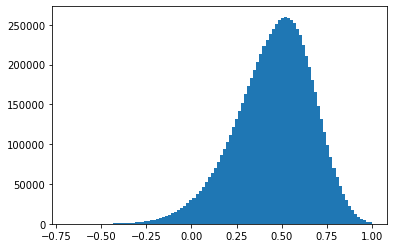

In [33]:
plt.hist(corr.flatten()[::10], bins=100);

<AxesSubplot:>

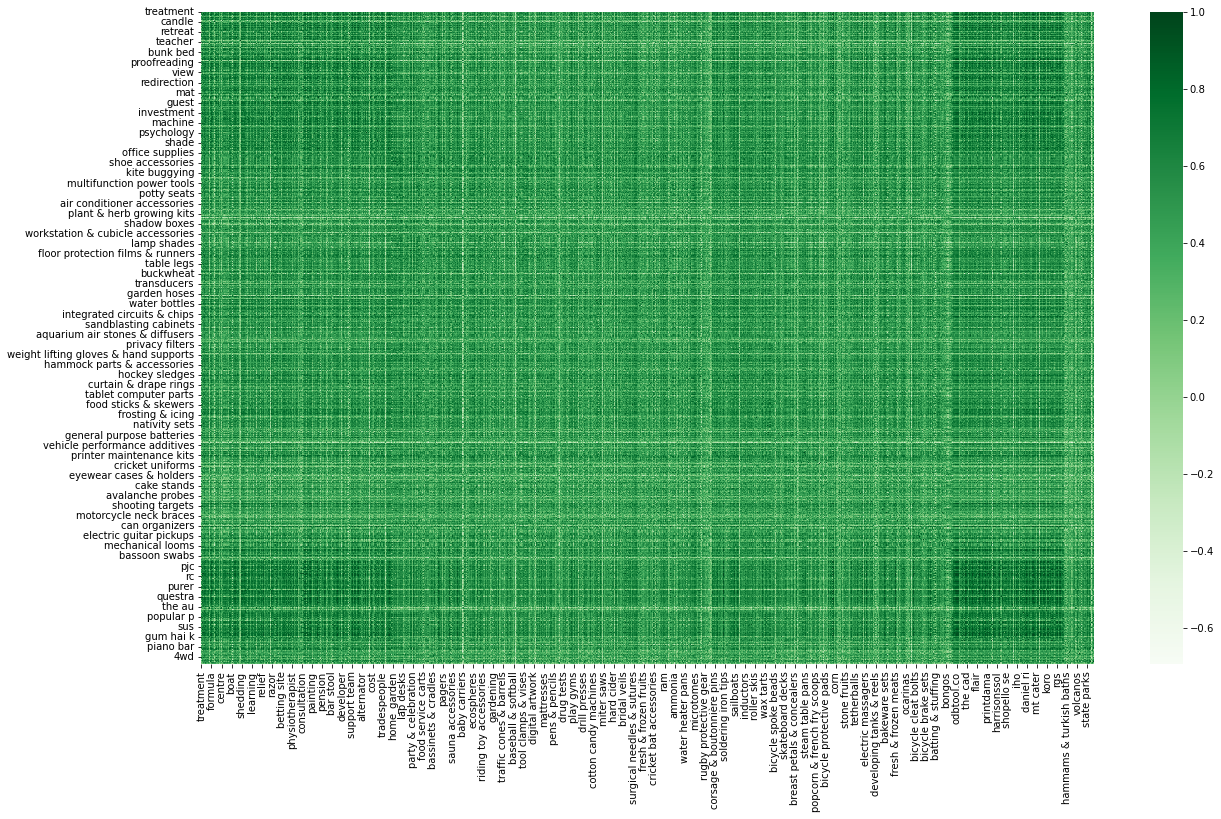

In [132]:
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(df_corr, cmap="Greens",annot=False)

<AxesSubplot:>

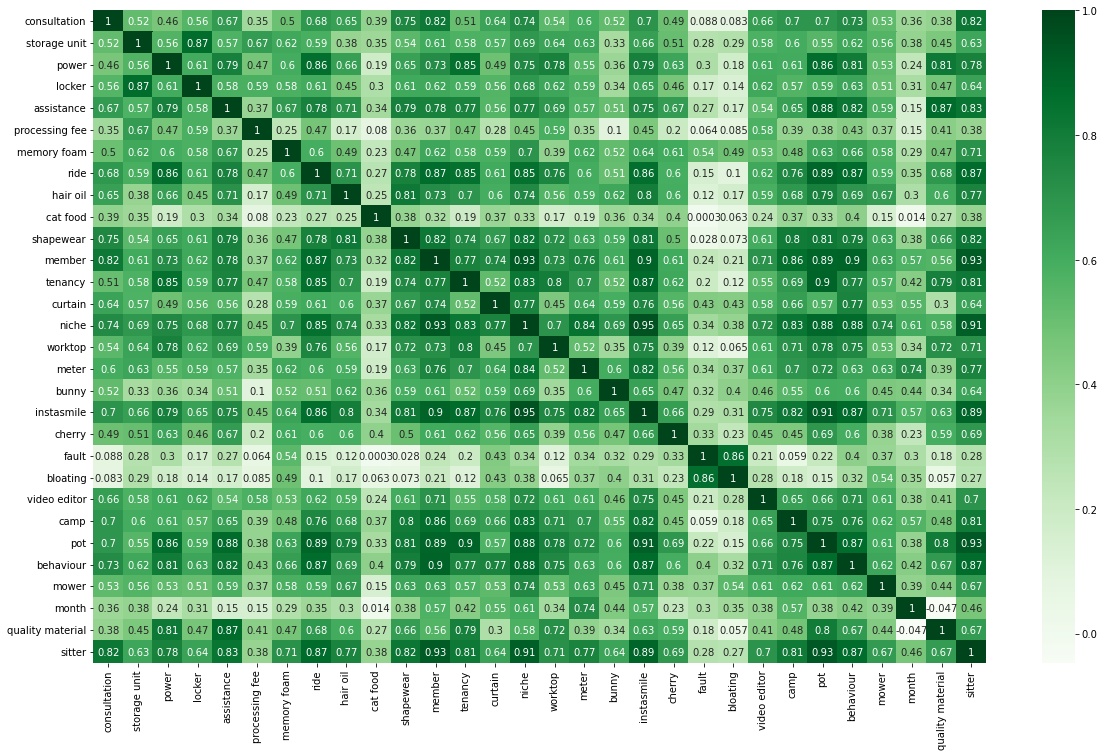

In [122]:
import seaborn as sns
scope=[1000, 1030]
plt.figure(figsize=(20,12))
sns.heatmap(df_corr.iloc[scope[0]:scope[1],scope[0]:scope[1]], cmap="Greens",annot=True)

## Statistics and neighbors (per candidate)

In [97]:
df_stats = pd.read_parquet('%s/topic_cand_stats.parquet'%data_dir)

In [98]:
df_stats.iloc[7200:,:].head(10)

count        mean         std    min   25%  \
bicycle brake sets         3048056.0  109.324687   99.206965 -327.0  39.0   
wok brushes                3048056.0  115.992520  104.171645 -315.0  45.0   
makeup brushes             3048056.0   95.271338  115.292675 -374.0  14.0   
windsurfing board masts    3048056.0   51.385361   83.287102 -303.0  -6.0   
drawing & painting paper   3048056.0   43.720573   92.070870 -387.0 -19.0   
brayer rollers             3048056.0  104.942287  109.851340 -335.0  28.0   
buttons & snaps            3048056.0   78.902686  105.916475 -338.0   2.0   
stitch markers & counters  3048056.0  134.927544  103.849090 -298.0  62.0   
interfacing                3048056.0  146.653625  130.291645 -344.0  53.0   
bassoon stands             3048056.0   72.197432   97.342276 -326.0   6.0   

                             50%    75%    max  \
bicycle brake sets         113.0  180.0  778.0   
wok brushes                115.0  185.0  733.0   
makeup brushes              96.0  173.0  810.0   
windsurfing board masts     49.0  106.0  731.0   
drawing & painting paper    38.0  102.0  829.0   
brayer rollers             101.0  177.0  724.0   
buttons & snaps             75.0  152.0  737.0   
stitch markers & counters  136.0  208.0  792.0   
interfacing                148.0  240.0  765.0   
bassoon stands              68.0  134.0  620.0   

                                                          Nearest candidates  
bicycle brake sets         bicycle brake sets, bicycle brake calipers, bi...  
wok brushes                wok brushes, airbrushes, mouthwash, scrub brus...  
makeup brushes             makeup brushes, combs & brushes, scrub brushes...  
windsurfing board masts    windsurfing board masts, windsurfing sails, wi...  
drawing & painting paper   drawing & painting paper, drawing & painting k...  
brayer rollers             brayer rollers, vibraslaps, winches, crampons,...  
buttons & snaps            buttons & snaps, pinback buttons, camera gears...  
stitch markers & counters  stitch markers & counters, nailers & staplers,...  
interfacing                interfacing, connection, components, primers, ...  
bassoon stands             bassoon stands, bassoons, danishagrosho, danis...

<AxesSubplot:>

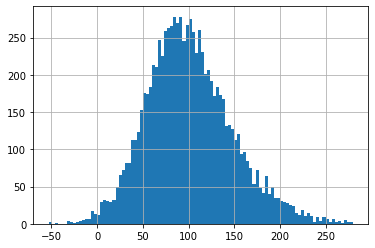

In [138]:
df_stats['mean'].hist(bins=100)

In [142]:
from pandas import option_context
with option_context('display.max_colwidth', 400):
    display(df_stats.sample(n=20).head(20))

count        mean         std    min  \
pneumatic drills                     3048056.0   79.545852   93.846677 -296.0   
rolling pins                         3048056.0  101.823290  108.099541 -309.0   
shoe accessories                     3048056.0  133.452100  114.579920 -303.0   
royalvegasca                         3048056.0  138.905530  131.945586 -415.0   
communication                        3048056.0  159.831582  141.514270 -402.0   
scooter                              3048056.0    7.045735   90.891751 -328.0   
pressure                             3048056.0  119.772237  140.561519 -387.0   
shopping tours                       3048056.0  171.263948  114.711774 -276.0   
musical instrument amplifier stands  3048056.0   71.443401  102.746138 -314.0   
watercraft storage covers            3048056.0  108.092037   96.679933 -292.0   
car wash                             3048056.0   47.462822  106.765259 -369.0   
tooth                                3048056.0   64.688317   92.932956 -296.0   
calend                               3048056.0  191.836758  173.039504 -401.0   
virtual currency                     3048056.0  113.032075  101.058907 -316.0   
pair                                 3048056.0  138.079895  152.868186 -361.0   
gaiters                              3048056.0  166.042484  160.154414 -380.0   
pet waste bags                       3048056.0   48.002448  107.473455 -349.0   
chairs                               3048056.0   59.007335  125.226252 -405.0   
ecotricity                           3048056.0   69.339267  116.302230 -377.0   
knitting needles                     3048056.0   89.728163   83.846770 -325.0   

                                      25%    50%    75%    max  \
pneumatic drills                     15.0   75.0  138.0  787.0   
rolling pins                         25.0  101.0  176.0  702.0   
shoe accessories                     53.0  136.0  213.0  847.0   
royalvegasca                         48.0  138.0  226.0  801.0   
communication                        59.0  157.0  258.0  854.0   
scooter                             -56.0    5.0   64.0  780.0   
pressure                             18.0  115.0  217.0  880.0   
shopping tours                       93.0  166.0  245.0  877.0   
musical instrument amplifier stands  -1.0   68.0  140.0  809.0   
watercraft storage covers            42.0  106.0  170.0  729.0   
car wash                            -27.0   50.0  120.0  887.0   
tooth                                 0.0   59.0  123.0  837.0   
calend                               70.0  184.0  305.0  899.0   
virtual currency                     44.0  108.0  176.0  899.0   
pair                                 27.0  138.0  247.0  840.0   
gaiters                              54.0  156.0  266.0  909.0   
pet waste bags                      -28.0   42.0  118.0  690.0   
chairs                              -30.0   61.0  147.0  868.0   
ecotricity                          -14.0   70.0  153.0  791.0   
knitting needles                     34.0   91.0  146.0  768.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                  Nearest candidates  
pneumatic drills                                            pneumatic drills, drill, drills, drill presses, pneumatic hoses, pipe cutters, plumbing primer, drill & screwdriver accessories, nail drill accessories, drill bit sharpeners, physiotherapist, occupational & physical therapy equipment, drill & screwdriver bits, power tool & equipment manuals, power flossers, magister hydrauli, seismometer, holden motors, divot tools, hammers  
rolling pins                                                              

## Hierarchical clustering

In [10]:
# convert the redundant n*n square matrix form into a condensed nC2 array

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform

from matplotlib import pyplot as plt

n_sample = 10000

dist_matrix = (1-(corr)).astype('float32')
for i in range(dist_matrix.shape[0]):
    dist_matrix[i,i]=0
Z = squareform(dist_matrix[:n_sample,:n_sample], force='tovector')
Z = linkage(Z)

dgram_labels = list(df_corr.columns)[:n_sample] # range(1, 11)

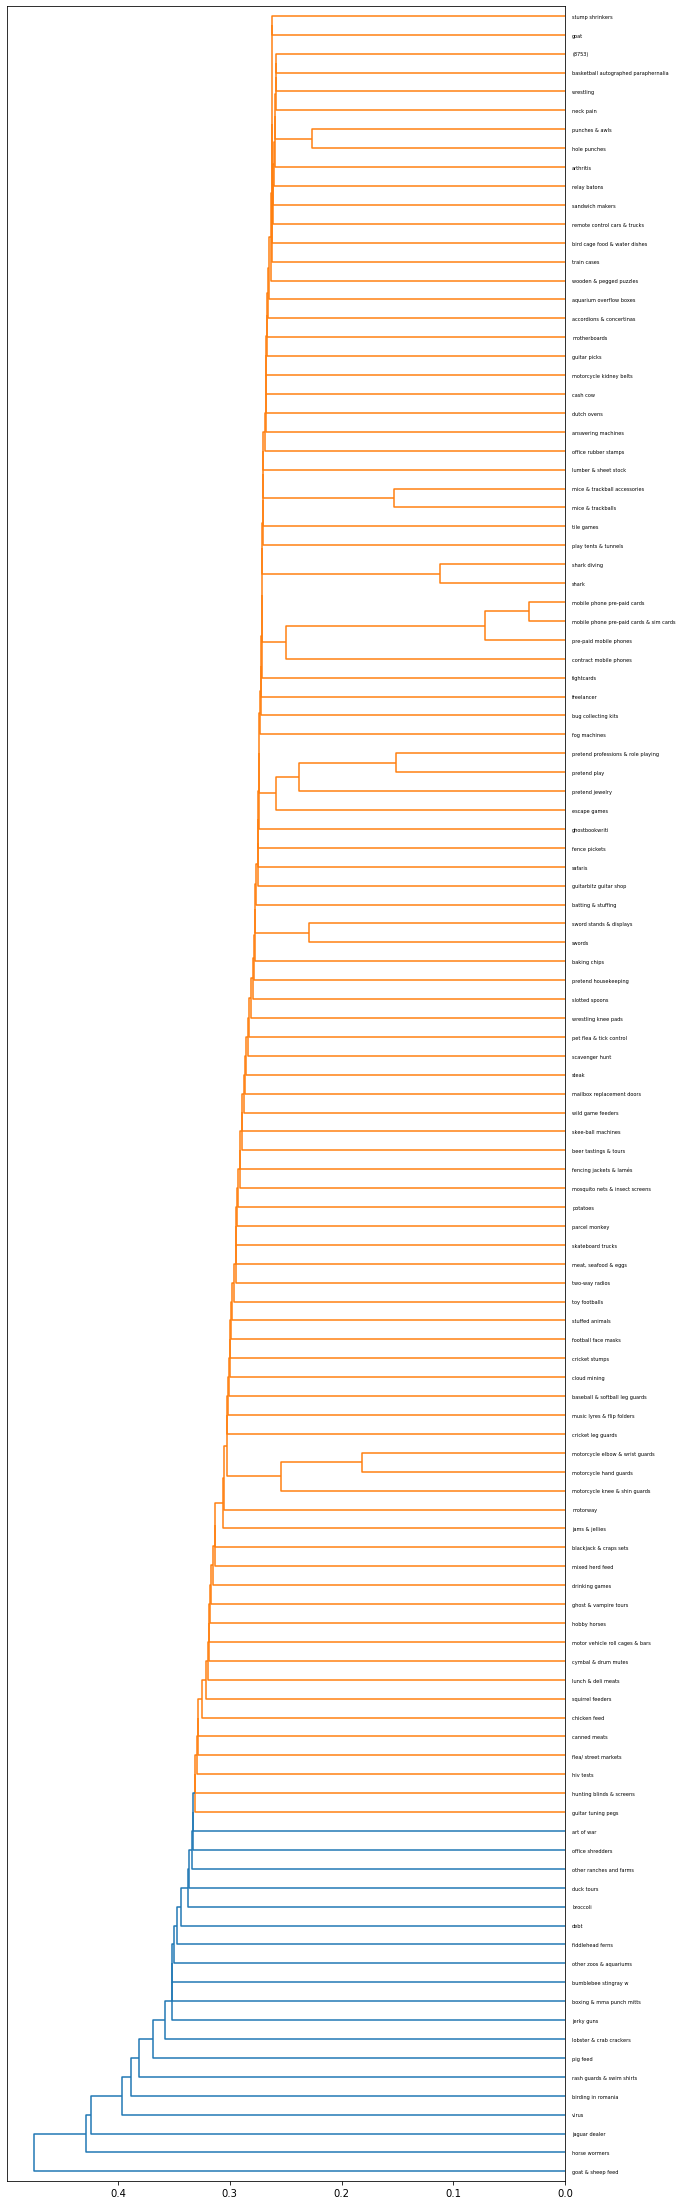

In [45]:
plt.figure(figsize=(10, 40))
dgram = dendrogram(Z,
            truncate_mode='level',
            p=100,
            orientation='left',
            labels=dgram_labels,
            distance_sort='ascending',
            show_leaf_counts=True, 
            )
plt.show()

Cluster threshold: 0.200  Clusters: 396


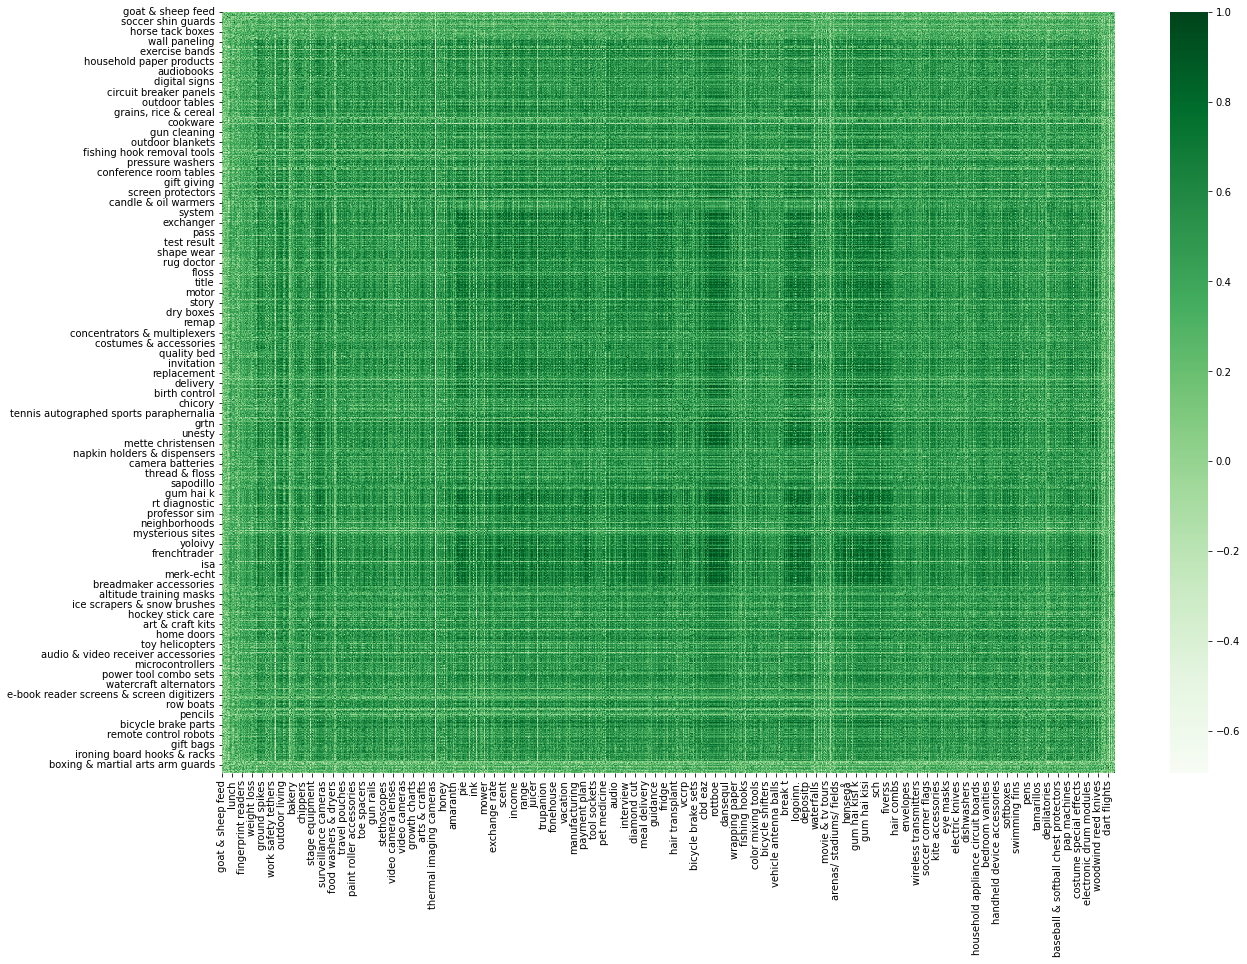

In [112]:
for threshold in [.2]: # [.15, .175, .2, .225, .25, .275, .3]:
    labels = fcluster(Z, threshold, criterion='distance') #criterion='distance')
    #np.unique(labels)
    #labels
    sorted_cands = list(np.argsort(labels)[::-1])
    df_corr_clustered = df_corr.iloc[sorted_cands,sorted_cands]

    import seaborn as sns
    print('Cluster threshold: %.3f  Clusters: %d'%(threshold, len(np.unique(labels))))
    plt.figure(figsize=(20,14))
    sns.heatmap(df_corr_clustered.iloc[:,:], cmap="Greens",annot=False)
    plt.show()

In [113]:
df_clusters = pd.DataFrame(index=list(df_corr.columns), columns=['cluster_id'])
df_clusters['cluster_id'] = labels

In [114]:
for c in range(df_clusters.cluster_id.max()):
    cluster_size = df_clusters[df_clusters.cluster_id==c].shape[0]
    if cluster_size>=3:
        print('Cluster size: %d'%(cluster_size))
        display(df_clusters[df_clusters.cluster_id==c].head(10))

Cluster size: 3


cluster_id
pre-paid mobile phones                            8
mobile phone pre-paid cards & sim cards           8
mobile phone pre-paid cards                       8

Cluster size: 4


cluster_id
cat litter                     17
cat litter box mats            17
cat litter boxes               17
cat litter box liners          17

Cluster size: 3


cluster_id
replacement battery                     18
replacement phone                       18
mobile phone replacement parts          18

Cluster size: 4


cluster_id
cryptocurrency             23
crypto                     23
cryptotax                  23
crypto hopper app          23

Cluster size: 3


cluster_id
pickleball                  24
pickleballs                 24
pickleball paddles          24

Cluster size: 4


cluster_id
meat                      28
meat tenderizers          28
kødsnedker                28
kødsned                   28

Cluster size: 7


cluster_id
throwing darts           32
dart backboards          32
dartboards               32
dart parts               32
darts                    32
dart shafts              32
dart tips                32

Cluster size: 5


cluster_id
tablet computer replacement speakers          34
laptop replacement speakers                   34
laptop replacement cables                     34
laptop replacement keyboards                  34
laptop replacement screens                    34

Cluster size: 4


cluster_id
popcorn makers                       38
popcorn maker accessories            38
popcorn                              38
popcorn & french fry scoops          38

Cluster size: 4


cluster_id
boxer                          42
boxing & martial arts          42
boxing ring parts              42
boxing rings                   42

Cluster size: 4


cluster_id
ski & snowboard bags                              47
vehicle ski & snowboard racks                     47
ski & snowboard storage racks                     47
vehicle ski & snowboard rack accessories          47

Cluster size: 3


cluster_id
bows & crossbows                    50
bow & crossbow accessories          50
crossbows                           50

Cluster size: 3


cluster_id
clay pigeon shooting          53
clay pigeon throwers          53
clay pigeons                  53

Cluster size: 4


cluster_id
animal husbandry                      61
livestock feed                        61
livestock feeders & waterers          61
cattle feed                           61

Cluster size: 8403


cluster_id
treatment               62
representative          62
salary finance          62
webinar                 62
upwork                  62
cheat                   62
gold chain              62
reminder                62
van                     62
gut                     62

In [ ]:
# potential criterion for elimination:  low importance, but existing similar correlates
# in other case we might still keep low-important item, due to its uniqueness